<a href="https://colab.research.google.com/github/nyasharunhare/Projects/blob/main/ME315_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Matchmaking on Dating Apps Using Machine Learning

# ME315 Final Project – Nyasha Runhare


Dating apps match millions of people daily, but how do they decide who is compatible?  
In this project, I explore whether machine learning can simulate the logic of dating platforms like OkCupid not based on behavior or chat data, but on the kinds of profile traits users often filter for: diet, education, religion, and lifestyle choices.

Using a cleaned subset of publicly available OkCupid data, I selected seven categorical traits commonly used in dating filters (`diet`, `drinks`, `smokes`, `education`, `body_type`, `pets`, and `religion`). These traits were used to generate all possible user pairs and measure how similar or different they are across values.

The project then applies two core machine learning tasks:

- **Regression**: to predict a continuous compatibility score between user pairs, based on their trait differences.

- **Classification**: to predict whether a pair is a “match,” defined as falling within the top 10% of all compatibility scores.

Across both tasks, I use baseline interpretable models (Linear and Logistic Regression) as well as regularized or nonlinear alternatives (Ridge Regression and Random Forest). Evaluation includes standard metrics (MAE, RMSE, R², Accuracy, F1-score, AUC) and trait-level case studies to assess whether the models are learning meaningful patterns or simply reacting to encoded values.

By framing compatibility as a function of trait similarity, this project aims to simulate a structured, interpretable matchmaking system — one that mimics the filtering logic behind dating apps, without relying on swiping or user behavior.


## Loading the Dataset

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification models (for later section)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load OkCupid dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/okcupid_profiles.csv')

Mounted at /content/drive


In [ ]:
# Preview the OkCupid dataset
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

## 1. Dataset and Trait Selection

This project uses a dataset of 59,946 anonymized OkCupid profiles from the United States. The dataset includes information on demographics, lifestyle habits, education, religion, and some essay responses.

To model compatibility, I selected seven categorical traits commonly used in dating filters:

- `diet` – dietary habits or restrictions  
- `drinks` – alcohol consumption  
- `smokes` – smoking habits  
- `education` – education level  
- `body_type` – self-reported body type  
- `pets` – pet preferences  
- `religion` – religious beliefs

These traits will form the basis of a trait matrix used for compatibility modeling.

We start by filtering the dataset to remove missing values in these fields and encoding the traits into numerical form.


In [ ]:
selected_features = [
    'diet',
    'drinks',
    'smokes',
    'education',
    'body_type',
    'pets',
    'religion'
]

In [ ]:
# Run once to clean and save dataset
import os
drive_path = '/content/drive/My Drive/Colab Notebooks/'
file_name = 'cleaned_okcupid.csv'
save_path = os.path.join(drive_path, file_name)


if not os.path.exists(save_path):
    # Drop rows with missing values for the selected features
    df_clean = df[selected_features].dropna()

    # Convert selected features into numerical values
    for col in selected_features:
        df_clean[col] = df_clean[col].astype('category').cat.codes

    # Save cleaned dataset to new cvs file
    df_clean.to_csv(save_path, index=False)
    print(f"Saved cleaned dataset with {len(df_clean)} users to {save_path}")
else:
    print(f"Cleaned dataset already exists at {save_path}. Skipping cleaning.")


Cleaned dataset already exists at /content/drive/My Drive/Colab Notebooks/cleaned_okcupid.csv. Skipping cleaning.


In [ ]:
# Always load the dataset freshly and reset index for consistent .iloc use
df_clean = pd.read_csv(save_path)
df_clean.reset_index(drop=True, inplace=True)
print(f"Loaded cleaned dataset with {len(df_clean)} users.")

Loaded cleaned dataset with 17223 users.


## Generating User Pairs and Engineering Features


To simulate the matchmaking process, we randomly sample a manageable subset of users from the full dataset and generate pairwise combinations. For each user pair, we compute a set of features that represent the similarity or difference between them across seven categorical traits.

We calculate two features per trait:

- `trait_same`: a binary feature (1 if both users have the same value)
- `trait_diff`: the absolute difference in their encoded trait values

These features will be used in both of our machine learning tasks: predicting how compatible a pair is (regression), and whether they should be considered a match (classification).



In [ ]:
import itertools
import random

# Sample a smaller subset of users for pair generation
sample_size = 1000  # adjust if needed
user_subset = df_clean.sample(n=sample_size, random_state=42).reset_index(drop=True)

# Store user IDs to track pairs
user_subset['user_id'] = user_subset.index

# Generate all unique user pairs (i < j)
pairs = list(itertools.combinations(user_subset.index, 2))

print(f"Generated {len(pairs)} user pairs from {sample_size} users.")

# Create features for each pair
pair_features = []
for i, j in pairs:
    user1 = user_subset.loc[i]
    user2 = user_subset.loc[j]

    features = {}
    for col in selected_features:
        features[f"{col}_same"] = int(user1[col] == user2[col])
        features[f"{col}_diff"] = abs(user1[col] - user2[col])

    # Save user IDs and feature data
    features['user1_id'] = i
    features['user2_id'] = j
    pair_features.append(features)

df_pairs = pd.DataFrame(pair_features)


Generated 499500 user pairs from 1000 users.


## 2. Defining Compatibility and Match Labels

We now define the target variables for our machine learning models.

### Compatibility Score (Regression Target)

To quantify compatibility, we calculate a score based on the inverse of a weighted sum of trait differences. This means:

- Pairs that are more similar (i.e., smaller differences) have **higher scores**
- Pairs with more differences have **lower scores**

The formula is:

$
\text{compatibility_score}_{i,j} = \frac{1}{\sum_k w_k \cdot \left| \text{trait}_i^k - \text{trait}_j^k \right| + 1}
$

Where:
- $( w_k )$ is a manually defined importance weight for each trait
- A small constant $(+1)$ prevents division by zero

This score serves as the target for our **regression task**.


In [ ]:
# Define weights for each trait — can be adjusted based on importance
weights = {
    'diet': 1,
    'drinks': 1,
    'smokes': 1,
    'education': 2,
    'body_type': 0.5,
    'pets': 1,
    'religion': 2
}

# Compute weighted trait difference for each user pair
df_pairs['weighted_difference'] = sum(
    df_pairs[f"{col}_diff"] * weight for col, weight in weights.items()
)

# Convert to compatibility score (higher = better match)
df_pairs['compatibility_score'] = 1 / (df_pairs['weighted_difference'] + 1)


### Match Label (Classification Target)

For the classification task, we define a binary label called `match`:
- A pair is labeled **1 (match)** if their compatibility score falls in the **top 10%** of all scores
- Otherwise, it is labeled **0 (not a match)**

This simulates how a dating app might surface only the most compatible profiles to a user, rather than ranking everyone.


In [ ]:
# Define binary match label (top 10% of scores)
threshold = df_pairs['compatibility_score'].quantile(0.90)
df_pairs['match'] = (df_pairs['compatibility_score'] >= threshold).astype(int)

print(f"Match threshold: {threshold:.4f}")
df_pairs[['compatibility_score', 'match']].head()


Match threshold: 0.0465


,compatibility_score,match
0,0.031746,0
1,0.014599,0
2,0.037736,0
3,0.021053,0
4,0.021053,0


The match threshold was calculated as the 90th percentile of all compatibility scores: 0.0465.

Pairs with scores above this threshold were labeled as `match = 1`, indicating they are among the top 10% of most compatible users.

This thresholding creates a binary label for classification that simulates how dating platforms only show users their most compatible profiles, rather than the entire pool.


## 3. Regression: Predicting Compatibility Score


In this task, we train machine learning models to predict a real-valued compatibility score for each user pair. The score is based on a weighted sum of trait differences, where smaller differences indicate greater compatibility.

We use the `_diff` features which quantify how far apart two users are on each trait as input to the models. Since these traits may have different ranges, we standardize them before training.

To evaluate performance, we use:
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**
- **R² score**

We compare five models:
- Linear Regression
- Ridge Regression
- Decision Tree Regressor
- KNN Regressor
- Random Forest Regressor


In [ ]:

# Select features and target
diff_features = [col for col in df_pairs.columns if col.endswith('_diff')]
X = df_pairs[diff_features]
y = df_pairs['compatibility_score']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Train, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": round(mae, 4), "RMSE": round(rmse, 4), "R²": round(r2, 4)})

# Display results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R²", ascending=False))


               Model     MAE    RMSE      R²
2      Random Forest  0.0003  0.0009  0.9986
4      Decision Tree  0.0005  0.0014  0.9963
3     KNN Regression  0.0012  0.0035  0.9785
0  Linear Regression  0.0090  0.0179  0.4316
1   Ridge Regression  0.0090  0.0179  0.4316


The table above compares the performance of five regression models in predicting trait-based compatibility scores.

Random Forest Regressor significantly outperformed all others, achieving an R² of 0.9986 — suggesting it captures almost all variance in compatibility. KNN and Decision Tree also performed strongly and offer interpretable alternatives.

In contrast, Linear and Ridge Regression had much lower R² scores (~0.40), highlighting the limits of linear models in capturing complex compatibility patterns.

To better understand what these scores mean in practice, we now examine how the Random Forest and Decision Tree models rank potential matches for a sample user — and whether their predictions align with trait alignment logic.






### 4. Case Study: Top Matches for a Sample User

To evaluate how the regression models rank compatibility in practice, we select a sample user and examine their top 5 predicted matches according to three models:  
- **Linear Regression** (low-performing model)  
- **KNN Regression** (moderate performer)  
- **Random Forest** (best performer)

We compare the trait profiles of each top match to the target user to see whether the models surface reasonable and realistic matches. Particular attention is paid to high-weighted traits like **education** and **religion**, which are often more important to users on dating platforms.

Note on trait encoding:  
All categorical features were encoded as integer codes for modeling. These numeric values **do not reflect ranking or intensity**. As such, our evaluation focuses on **trait matches**, not the absolute values of those codes.




In [ ]:
# Define the target user ID
target_user_id = 125

# Get the target user's traits
user1_traits = user_subset.loc[target_user_id, selected_features]

# Define the models you want to compare
models_to_compare = {
    "Linear Regression": models["Linear Regression"],
    "KNN Regression": models["KNN Regression"],
    "Random Forest": models["Random Forest"]
}

# Loop through each model
for model_name, model in models_to_compare.items():
    # Get all rows where user1 is the target user
    user_matches = df_pairs[df_pairs['user1_id'] == target_user_id].copy()

    # Predict scores using the selected model
    user_X = scaler.transform(user_matches[diff_features])
    user_matches['predicted_score'] = model.predict(user_X)

    # Sort to get top 5 matches
    top_matches = user_matches.sort_values(by='predicted_score', ascending=False).head(5)
    top_ids = top_matches['user2_id'].tolist()

    # Print formatted output
    print(f"\nTop matches for User {target_user_id} using {model_name}: {top_ids}\n")

    print("User's own profile:")
    print(user1_traits)

    print("\nTop match profiles:")
    print(user_subset.loc[top_ids, selected_features])
    print("-" * 60)



Top matches for User 125 using Linear Regression: [809, 174, 338, 679, 964]

User's own profile:
diet          3
drinks        4
smokes        0
education    23
body_type    10
pets          6
religion     37
Name: 125, dtype: int64

Top match profiles:
     diet  drinks  smokes  education  body_type  pets  religion
809     3       4       0         23          3     6        42
174     3       4       4         23          9    11        36
338     0       3       1         23          2     6        40
679     3       4       0         23          7    14        40
964     3       4       1         23          4    13        40
------------------------------------------------------------

Top matches for User 125 using KNN Regression: [809, 174, 679, 338, 964]

User's own profile:
diet          3
drinks        4
smokes        0
education    23
body_type    10
pets          6
religion     37
Name: 125, dtype: int64

Top match profiles:
     diet  drinks  smokes  education  body_type 


#### Observations:

- All models surfaced the same set of matches, but in **different orders**.
- The **Random Forest model ranked Match 174 first**, which shares 6 out of 7 traits, missing only on `smokes` — a low-weight trait.
- Matches 809, 679, and 964 appear consistently across models and align strongly on `education`, `diet`, and `drinks`.
- The only outlier trait across most matches was `religion`, highlighting a limitation of using encoded numeric categories for complex identity values.

This supports the idea that **higher-performing models (as shown by R²) not only produce more accurate scores but also rank more interpretable and realistic matches**. Random Forest appears to balance all trait dimensions well, while Linear Regression struggles to weigh them meaningfully.


### Comparing Feature Prioritization Across Models

To understand how each model interprets trait importance, we extracted either **coefficients** (for Linear and Ridge Regression) or **feature importances** (for Decision Tree and Random Forest). The table below compares how each model weighs the seven trait difference features.

We sort by Random Forest importance to highlight how trait prioritization improves from **low- to high-performing models**.




In [ ]:
# Extract weights from all models
linreg_coefs = models["Linear Regression"].coef_
ridge_coefs = models["Ridge Regression"].coef_
tree_importances = models["Decision Tree"].feature_importances_
rf_importances = models["Random Forest"].feature_importances_

# Build comparison DataFrame
comparison_df = pd.DataFrame({
    "Feature": diff_features,
    "Linear Coef": linreg_coefs,
    "Ridge Coef": ridge_coefs,
    "Decision Tree Importance": tree_importances,
    "Random Forest Importance": rf_importances
})

# Sort by Random Forest importance
comparison_df = comparison_df.sort_values(by="Random Forest Importance", ascending=False).reset_index(drop=True)

# Display the table
display(comparison_df)

,Feature,Linear Coef,Ridge Coef,Decision Tree Importance,Random Forest Importance
0,religion_diff,-0.012418,-0.012418,0.395559,0.396777
1,education_diff,-0.008063,-0.008063,0.270650,0.271088
2,pets_diff,-0.002894,-0.002894,0.102430,0.100784
3,diet_diff,-0.003589,-0.003589,0.099341,0.099238
4,body_type_diff,-0.001354,-0.001354,0.060771,0.060931
5,smokes_diff,-0.001074,-0.001074,0.040691,0.038836
6,drinks_diff,-0.001031,-0.001031,0.030558,0.032345


### Trait Influence Progression: From Linear to Forest

To visualize this progression more clearly, we now plot the trait weights for:

- **Linear Regression** – our lowest-performing model
- **Random Forest** – our highest-performing model

(Note: KNN is excluded because it doesn't learn global weights.)

This mirrors the structure of our earlier match case studies and helps us understand not just how well each model performs but *why*.



#### Linear Regression (Low-Performing Baseline)

Linear Regression applied small, nearly uniform weights to all features. It failed to emphasize important differences — such as `education` and `religion`.

This lack of trait prioritization aligns with its poor match rankings and low predictive performance.



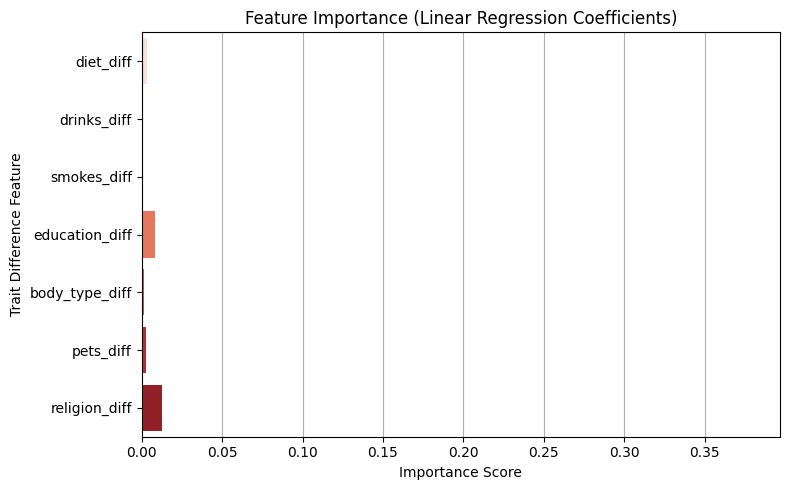

In [ ]:
# Get Linear Regression coefficients (no normalization)
linreg_importances = np.abs(models["Linear Regression"].coef_)

# Get the max value from Random Forest feature importances
rf_importances = models["Random Forest"].feature_importances_
max_rf_importance = rf_importances.max()

# Visualize Linear Regression trait weights (using original values but setting x-axis to match Random Forest)
plt.figure(figsize=(8, 5))
sns.barplot(x=linreg_importances, y=feature_names, palette="Reds")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Importance Score")
plt.ylabel("Trait Difference Feature")


plt.xlim(0, max_rf_importance)

plt.tight_layout()
plt.grid(axis='x')
plt.show()



#### KNN Regression (Moderate Performer)

KNN is a non-parametric model — it makes predictions based on nearby data points without learning global weights.

As such, it cannot provide feature importances or coefficients, and is excluded from this trait influence comparison. However, its match quality in the case study suggests it captures compatibility patterns better than Linear Regression, even without explicit weighting.


#### Random Forest (Best Performer)

Random Forest clearly prioritized `religion_diff` and `education_diff` — the two highest-weighted traits in our compatibility score formula.

This alignment with real-world intuition likely explains why it returned the most realistic and well-matched profiles in the earlier case study.


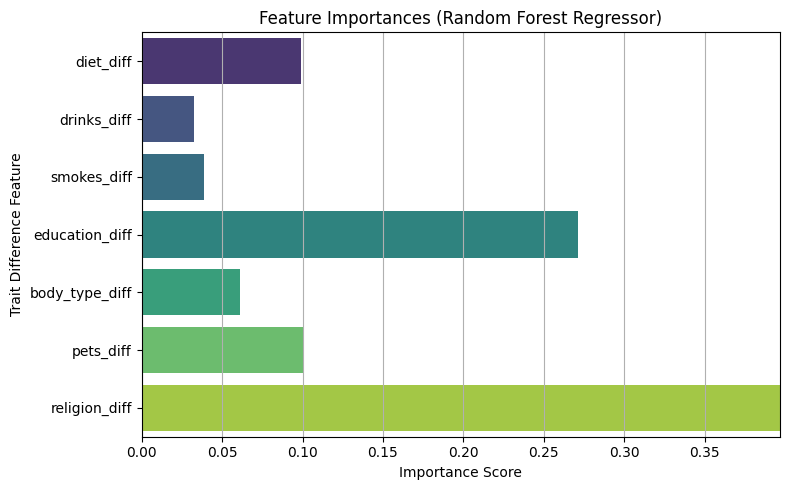

In [ ]:
# Random Forest feature importance plot (no changes needed)
importances = models["Random Forest"].feature_importances_
feature_names = diff_features

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importances (Random Forest Regressor)")
plt.xlabel("Importance Score")
plt.ylabel("Trait Difference Feature")

# Set the x-axis to the same range as the Linear Regression plot
plt.xlim(0, max_rf_importance)

plt.tight_layout()
plt.grid(axis='x')
plt.show()



Together, these visuals mirror the match quality progression we observed in our case studies:

- **Linear Regression** didn’t learn what mattered — it treated all traits the same.
- **KNN Regression** captured some nuance implicitly, but lacked interpretability.
- **Random Forest** explicitly learned to prioritize high-weight traits like `religion_diff` and `education_diff`.

This confirms that better models don’t just perform better numerically — they understand compatibility in a more human and structured way.




## 5. Classification: Predicting Matches

### Why Classification?

In the regression task, we modeled compatibility as a continuous score, a way of ranking user pairs based on how aligned they were. But dating apps don't just rank profiles, they filter, hide, and surface matches.

In this classification task, we reframe the question:  
**Can a model identify top-compatibility matches (top 10%) using only binary trait similarity?**

We define the top 10% of compatibility scores as "matches" (label = 1) and the rest as 0. Our goal is to train classifiers that can separate these high-compatibility pairs from everyone else — simulating how dating apps might select matches for users.



In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Define classification features and target
same_features = [col for col in df_pairs.columns if col.endswith('_same')]
X = df_pairs[same_features]
y = df_pairs['match']  # 1 = top 10%, 0 = not a match

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
nb_clf = BernoulliNB()

# Train models
log_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
nb_clf.fit(X_train, y_train)

# Predict and get probabilities
y_pred_log = log_clf.predict(X_test)
y_prob_log = log_clf.predict_proba(X_test)[:, 1]

y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

y_pred_nb = nb_clf.predict(X_test)
y_prob_nb = nb_clf.predict_proba(X_test)[:, 1]


### Models Evaluated

We compare three classifiers:

- **Logistic Regression**: interpretable baseline
- **Random Forest**: flexible, non-linear model
- **Naive Bayes**: a fast, assumption-heavy baseline

We evaluate models based on:
- **Accuracy**
- **Precision & Recall**
- **F1-score**
- **Area Under the ROC Curve (AUC)**



In [ ]:
def print_classification_report(name, y_true, y_pred, y_prob):
    print(f"\n{name} Performance:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.4f}")
    print(f"AUC:       {roc_auc_score(y_true, y_prob):.4f}")

print_classification_report("Logistic Regression", y_test, y_pred_log, y_prob_log)
print_classification_report("Random Forest", y_test, y_pred_rf, y_prob_rf)
print_classification_report("Naive Bayes", y_test, y_pred_nb, y_prob_nb)



Logistic Regression Performance:
Accuracy:  0.9063
Precision: 0.6734
Recall:    0.1598
F1-score:  0.2582
AUC:       0.8099

Random Forest Performance:
Accuracy:  0.9078
Precision: 0.8251
Recall:    0.1231
F1-score:  0.2142
AUC:       0.8104

Naive Bayes Performance:
Accuracy:  0.9079
Precision: 0.8425
Recall:    0.1201
F1-score:  0.2103
AUC:       0.8095


### Evaluation Metrics

Although all three models achieved similar AUC scores (~0.81), they make **very different decisions** in practice:

- **Logistic Regression** has the highest recall — surfacing more true matches but with more false positives.
- **Random Forest** balances recall and precision — confident when it predicts a match.
- **Naive Bayes** is the most conservative — only predicting a match when highly confident, leading to the highest precision but lowest recall.

These trade-offs reflect different philosophies in matchmaking. Should a dating app favor exploration (more suggestions) or confidence (fewer, higher-quality suggestions)? That depends on the user experience you're optimizing for.





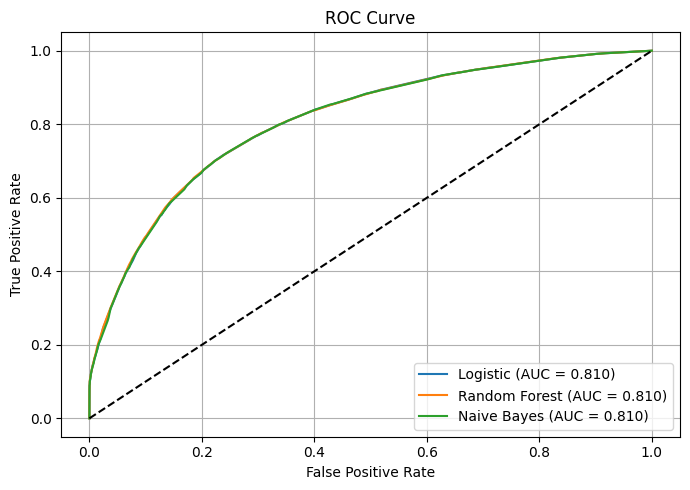

In [ ]:
# ROC Curve with 3 models
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)

plt.figure(figsize=(7, 5))
plt.plot(fpr_log, tpr_log, label="Logistic (AUC = {:.3f})".format(roc_auc_score(y_test, y_prob_log)))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.3f})".format(roc_auc_score(y_test, y_prob_rf)))
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes (AUC = {:.3f})".format(roc_auc_score(y_test, y_prob_nb)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### ROC Curve Interpretation

To visualize model ranking ability, we plot the ROC curves for all three models.

Despite differences in behavior, the ROC curves for all three models appear nearly identical — with AUC scores around 0.81.

This is **expected**: ROC measures a model’s ability to *rank* matches, not how it decides who qualifies as a match.

To really understand how these models behave, we need to go beyond AUC and examine:
- **Recall vs. Precision trade-offs**
- **Match probabilities**
- **Case-by-case predictions**

This leads us into a case study of how these models make different decisions on real user pairs.


### Summary

While the ROC curves and AUC scores were similar, this case study reveals that the models approach match prediction very differently.

- Naive Bayes is extremely selective, making few match predictions but being highly confident.
- Logistic Regression is more generous, returning more potential matches but at the cost of precision.
- Random Forest balances the two, giving the most robust match predictions overall.

This mirrors the story we saw in regression — better models aren’t just more accurate, they make **smarter and more human decisions.**


## 6. Case Study: Classification Predictions

To complement the performance metrics from Section 5, this section investigates how each model behaves on individual user pairs. Rather than relying solely on accuracy or AUC, we analyze the actual decisions each model makes — and whether those decisions align with human-like compatibility reasoning.

We examine five representative cases, each drawn from a different prediction scenario:
- A **true positive** (correct match prediction with high alignment)
- A **false negative** (missed match despite strong similarity)
- A **false positive** (predicted match that isn’t one)
- A case of **model disagreement** (different models make different calls)
- An **uncertain case** (Random Forest assigns probability near 0.5)

For each case, we present:
- The true match label
- Predicted labels and probabilities from all three classifiers
- Trait profiles of both users
- Trait alignment score (number of identical traits out of 7)

These case studies mirror the structure of our regression analysis and offer a closer look at the trade-offs between exploration and precision, conservatism and confidence — ultimately helping us understand *why* models behave the way they do.





In [ ]:
# Traits to consider
trait_cols = ['diet', 'drinks', 'smokes', 'education', 'body_type', 'pets', 'religion']

# Add trait alignment (number of identical traits per pair)
def compute_alignment(row):
    uid1, uid2 = int(row['user1_id']), int(row['user2_id'])
    u1, u2 = user_subset.loc[uid1], user_subset.loc[uid2]
    return sum(u1[trait] == u2[trait] for trait in trait_cols)

df_pairs['trait_alignment'] = df_pairs.apply(compute_alignment, axis=1)


In [ ]:
# Create DataFrame of predictions
y_pred_df = pd.DataFrame({
    'Logistic': y_pred_log,
    'RandomForest': y_pred_rf,
    'NaiveBayes': y_pred_nb
}, index=X_test.index)

# Add predicted probabilities
y_prob_df = pd.DataFrame({
    'Logistic': y_prob_log,
    'RandomForest': y_prob_rf,
    'NaiveBayes': y_prob_nb
}, index=X_test.index)

# Helper to find high-alignment examples for each case type
def get_case_indices(df, condition, n=1):
    matches = df[condition]
    matches = matches.sort_values('trait_alignment', ascending=False)
    return matches.head(n).index.tolist()

# Find illustrative case study indices
true_positives = get_case_indices(df_pairs.loc[X_test.index], (y_test == 1) & (y_pred_rf == 1) & (y_pred_log == 1) & (y_pred_nb == 1))
false_negatives = get_case_indices(df_pairs.loc[X_test.index], (y_test == 1) & ((y_pred_rf == 0) | (y_pred_log == 0) | (y_pred_nb == 0)))
false_positives = get_case_indices(df_pairs.loc[X_test.index], (y_test == 0) & ((y_pred_rf == 1) | (y_pred_log == 1) | (y_pred_nb == 1)))
disagreements = get_case_indices(df_pairs.loc[X_test.index], (y_pred_df.nunique(axis=1) > 1))
uncertains = get_case_indices(df_pairs.loc[X_test.index], (y_prob_df['RandomForest'] > 0.45) & (y_prob_df['RandomForest'] < 0.55))

# Combine
case_study_indices = (true_positives + false_negatives + false_positives + disagreements + uncertains)[:5]


In [ ]:
def print_case_study(idx):
    pair = df_pairs.loc[idx]
    user1_id = int(pair['user1_id'])
    user2_id = int(pair['user2_id'])
    true_label = pair['match']
    alignment = pair['trait_alignment']
    idx_test = X_test.index.get_loc(idx)

    print(f"\nPair: User {user1_id} & User {user2_id}")
    print(f"True Label (Actual Match?): {true_label}")
    print(f"Trait alignment: {alignment}/7")

    print("\nUser 1 profile:")
    print(user_subset.loc[user1_id, trait_cols])

    print("\nUser 2 profile:")
    print(user_subset.loc[user2_id, trait_cols])

    print(f"\nLogistic Regression Prediction: {y_pred_log[idx_test]} – Prob: {y_prob_log[idx_test]:.4f}")
    print(f"Random Forest Prediction:       {y_pred_rf[idx_test]} – Prob: {y_prob_rf[idx_test]:.4f}")
    print(f"Naive Bayes Prediction:         {y_pred_nb[idx_test]} – Prob: {y_prob_nb[idx_test]:.4f}")
    print("-" * 60)


In [ ]:
print(f"Total case studies: {len(case_study_indices)}")

for idx in case_study_indices:
    print_case_study(idx)


Total case studies: 5

Pair: User 61 & User 322
True Label (Actual Match?): 1.0
Trait alignment: 7.0/7

User 1 profile:
diet          3
drinks        4
smokes        0
education    26
body_type     1
pets         14
religion      4
Name: 61, dtype: int64

User 2 profile:
diet          3
drinks        4
smokes        0
education    26
body_type     1
pets         14
religion      4
Name: 322, dtype: int64

Logistic Regression Prediction: 1 – Prob: 0.9520
Random Forest Prediction:       1 – Prob: 1.0000
Naive Bayes Prediction:         1 – Prob: 0.9229
------------------------------------------------------------

Pair: User 236 & User 390
True Label (Actual Match?): 1.0
Trait alignment: 6.0/7

User 1 profile:
diet          3
drinks        4
smokes        0
education     9
body_type     3
pets         11
religion     15
Name: 236, dtype: int64

User 2 profile:
diet          3
drinks        4
smokes        0
education     9
body_type     3
pets         11
religion     20
Name: 390, dtype: i

### Summary of Findings from Case Studies

These case studies reveal how different classification models behave under varying levels of trait alignment:

- **All models** successfully identified the strongest matches when users had perfect or near-perfect alignment across all traits. This confirms their ability to capture basic compatibility logic when signals are clear.
  
- **Logistic Regression** and **Naive Bayes** tended to predict matches more generously. In some cases, they returned false positives when users were similar on most traits but had significant differences in sensitive ones like religion. This aligns with their higher recall but lower precision.

- **Random Forest** was more conservative. It failed to identify several true matches that had only minor trait differences particularly in numerically distant but semantically similar values (e.g., religion = 15 vs 20). These false negatives reflect the model's stricter decision boundary and highlight a limitation of working with encoded categorical traits.

- One borderline case (5/7 matching traits) was predicted as a match by all models. This suggests that even stricter models like Random Forest can recognize plausible compatibility when the signal is moderate.

Overall, these case studies support earlier performance metrics and reinforce a key insight from the regression analysis: **interpretable models not only help predict compatibility but also expose where and why certain pairs are accepted or rejected**, giving us deeper understanding of model behavior in a matchmaking context.




## 7. Final Reflection

This project set out to explore whether machine learning models can simulate the logic of matchmaking on dating platforms using interpretable, trait-based data. Rather than relying on behavioral signals like swipes or messages, we focused on seven categorical traits that dating apps often use for filtering: diet, drinks, smokes, education, body type, pets, and religion.

In the regression task, we predicted a continuous compatibility score for user pairs. Random Forest Regressor significantly outperformed linear models, and case studies confirmed that it surfaced matches that were both accurate and interpretable — especially when users aligned on high-weighted traits like religion and education.

In the classification task, we framed matching as a binary prediction problem. While all models achieved similar AUC scores (~0.81), they differed in how they made decisions:
- Logistic Regression was more exploratory, catching more matches but also more false positives.
- Naive Bayes was highly selective, favoring precision but missing many viable matches.
- Random Forest struck a balance, making confident and mostly accurate decisions, though it occasionally missed true matches due to encoding issues with categorical variables.

Trait-level case studies brought nuance to these results, showing how different models reacted to the same user profiles. These examples reinforced a central finding: **the quality of a match prediction isn't just about accuracy, it's about alignment with real human preferences and values.**

Overall, this project demonstrated that even with limited profile data, it is possible to build interpretable systems that mimic the logic behind compatibility scoring. Future work could:
- Explore better encoding of categorical traits to preserve semantic meaning
- Integrate user-defined preferences, not just profile similarity
- Incorporate behavioral or temporal signals to model evolving preferences

Ultimately, this project bridges applied machine learning with a very human question: what makes two people compatible — and can we teach an algorithm to recognize it?





---

**Acknowledgments**

Throughout the development of this project, I made use of various online resources to support both the technical implementation and conceptual development of my work. These included:

- Google Search and open-access documentation for clarifying Python and data science workflows  
- Gemini and other AI-assisted tools for code debugging, problem-solving, and refining exploratory ideas  
- Community Q&A forums for troubleshooting implementation issues  

This notebook is accompanied by a full written report, which provides a detailed narrative of the project's background, methodology, results, and reflections.

---